<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [82]:
# Read CSV
house_csv = pd.read_csv("Sacramento_transactions.csv")

In [83]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [84]:
house_csv.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [85]:
house_csv['zip'] = house_csv['zip'].astype(str)

In [86]:
house_csv.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [87]:
house_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

<AxesSubplot:>

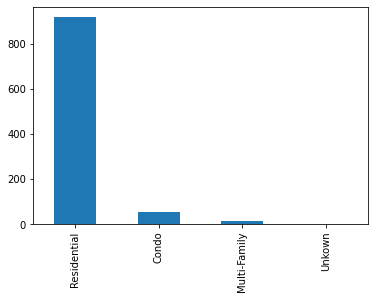

In [88]:
house_csv['type'].value_counts().plot(kind='bar')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [89]:
# ANSWER
#price - want to know 

Y = house_csv['price']

#### 2.2 List all possible variables which might be Predictor variable.

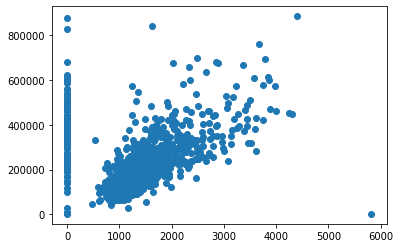

In [90]:
# ANSWER

X = house_csv['sq__ft']

plt.scatter(X, Y)

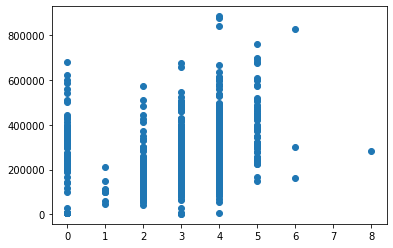

In [91]:
X1 = house_csv['beds']
plt.scatter(X1, Y)

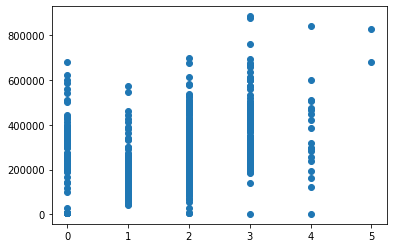

In [92]:
X2 = house_csv['baths']
plt.scatter(X2, Y)

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [93]:
# ANSWER
house_csv.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [94]:
##Sq__ft is the best predictor
#bed and baths have a strong correlation between themselves


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [95]:
house_csv['price'].mean()

234144.26395939087

In [96]:
# ANSWER
house_csv['y_hat'] = house_csv['price'].mean()

In [97]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [98]:
# ANSWER
res = abs(house_csv['price'] - house_csv['y_hat']).mean()
res

103452.16956891441

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [100]:
# ANSWER
X = house_csv['sq__ft']
Y = house_csv['price']


##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [101]:
# ANSWER
Xbar = X.mean()
Ybar = Y.mean()
print('Xbar = ', Xbar)
print('Ybar = ', Ybar)

n = np.sum((Y - Ybar) * (X - Xbar))
d = np.sum(np.square(X - Xbar))
print('n = ', n)
print('d = ', d)

beta_1 = n/d
print('beta_1 = ', beta_1)

Xbar =  1314.9167512690356
Ybar =  234144.26395939087
n =  38780198801.64468
d =  716048243.1736041
beta_1 =  54.158639688530755


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [37]:
# ANSWER
beta_0 = Ybar - (beta_1*Xbar)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [102]:
# ANSWER
y_hat = beta_0 + (beta_1*X)
house_csv['y_hat'] = y_hat
print(y_hat)
house_csv.head()

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,208206.784187
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,226133.293924
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,206040.438599
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,209073.322422
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,206094.597239


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [103]:
# ANSWER
resi = abs(house_csv['price'] - house_csv['y_hat'])
resi

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

In [104]:
resi.mean()

95860.1477021408

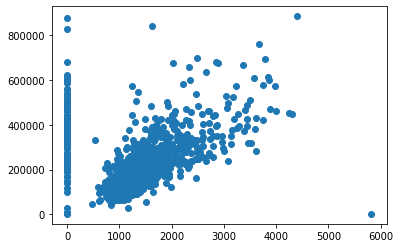

In [105]:
plt.scatter(X, Y)

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [106]:
# ANSWER
SSres = np.sum(np.square(house_csv['price'] - y_hat))
SSres

16738500924917.504

In [107]:
# ANSWER
SStot = np.sum(np.square(house_csv['price'] - Ybar))
SStot

18838783738865.37

In [110]:
Rsq = 1-(SSres / SStot)
Rsq

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

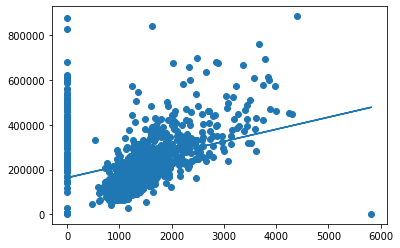

In [124]:
plt.scatter(X, Y)
plt.plot(X, y_hat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

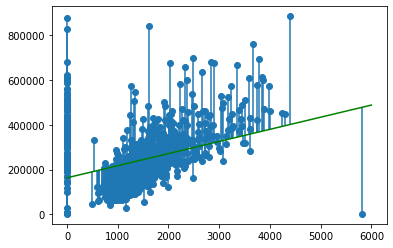

In [126]:
# ANSWER
fig, ax = plt.subplots()
plt.scatter(X, Y)
plt.plot([0, 6000], [162930.16140699777, 487881],color='green')
ax.vlines(X,Y,y_hat)

C:\Users\matt\.conda\envs\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq__ft', ylabel='price'>

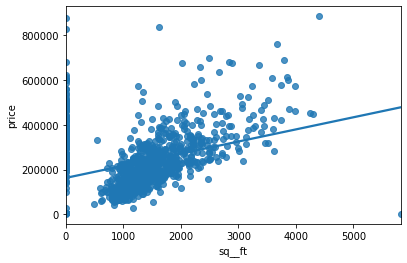

In [120]:
sns.regplot(X, Y, ci=None)

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [113]:
# ANSWER
#Using: y_hat = beta_0 + (beta_1*X)
est = beta_0 + (beta_1*1204)
est

228137.1635919888

In [127]:
def create_price_estimate(x):
    estimate = beta_0 + (beta_1 * x)
    
    return estimate

In [128]:
create_price_estimate(1204)

228137.1635919888

est2 = beta_0 + (beta_1*6000)
est2

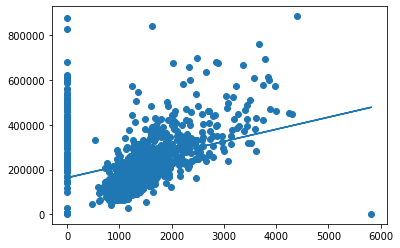

In [123]:
plt.scatter(X, Y)
plt.plot(X, y_hat)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



